<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/autumn_2022/Lab_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Wheat Seed Classification**

In this assignment, you will use the [Wheat Seed Dataset](https://archive.ics.uci.edu/ml/datasets/seeds) to classify the type of wheat seed based on the measurements of the seed. The dataset contains 7 attributes and 210 instances. The attributes are:

1. Area
2. Perimeter
3. Compactness
4. Length of Kernel
5. Width of Kernel
6. Asymmetry Coefficient
7. Length of Kernel Groove

Based on the attributes, the dataset contains 3 classes:

1. Kama
2. Rosa
3. Canadian

The text file `seeds_dataset.txt` contains the dataset. The first 7 columns are the attributes and the last column is the class label. The class labels are encoded as  1, 2, and 3 for Kama, Rosa, and Canadian, respectively. The goal of this assignment is to build a classifier that can predict the type of wheat seed based on the measurements of the seed. Follow the instructions below to complete the assignment.

#### **Instructions**

1. Download the dataset from [Github](https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/mirsazzathossain/CSE317-Lab-Numerical-Methods/blob/main/datasets/seeds_dataset.txt). It should be saved as `seeds_dataset.txt`.
2. Upload the dataset to your Google Drive and mount your Google Drive to Colab.
3. Read the dataset using numpy's built-in function `np.genfromtxt()`. Pass the following parameters to the function:
    - `fname`: The path to the dataset
    - `delimiter`: The delimiter used in the dataset to separate the attributes (Hint: Use `'\t'` as the delimiter)
    
4. Shuffle the dataset using `np.random.shuffle()`. Pass the following parameters to the function:
    - `x`: The dataset
5. Split the dataset into features and labels. The first 7 columns of the dataset are the features and the last column is the label. Use numpy's array slicing to split the dataset into features and labels. (Hint: Use `:` to select all the rows and `0:7` to select the first 7 columns for features and `7` to select the last column for labels)
6. Split the dataset into training and testing sets. Use numpy's built-in function `np.split()` to split the dataset into training and testing sets. Pass the following parameters to the function:
    - `ary`: The dataset
    - `indices_or_sections`: The number of instances in the training set (Hint: Use `int(0.8 * len(dataset))` to get the number of instances in the training set)
    - `axis`: The axis to split the dataset (Hint: Use `0` to split the dataset along the rows)
7. Find the minimum and maximum values of each feature in the training set. Use numpy's built-in function `np.min()` and `np.max()` to find the minimum and maximum values of each feature in the training set. Pass the following parameters to the function:
    - `a`: The training set
    - `axis`: The axis to find the minimum and maximum values (Hint: Use `0` to find the minimum and maximum values along the columns)
8. In this step, you must normalize the training and test sets. Nomalization is an essential part of every machine learning project. It is used to bring all the features to the same scale. If the features are not normalized, the higher-valued features will outnumber the lower-valued ones.

    For example, suppose we have a dataset with two features: the number of bedrooms in a house and the size of the garden in square feet and we are trying to forecast the rent of the residence. If the features are not normalized, the feature with higher values will take precedence over the feature with lower values. In this scenario, the garden area has a greater value. As a result, the model will make an attempt to forecast the house's price depending on the size of the garden. As a consequence, the model will be faulty since most individuals will not pay higher rent for more garden area. We need to normalize the features in order to prevent this. Let's look at the following illustration to better comprehend what we have said:
    
    - House 1: 2 bedrooms, 2500 sq. ft. garden
    - House 2: 3 bedrooms, 500 sq. ft. garden
    - House 3: 7 bedrooms, 2300 sq. ft. garden

    Considering that most people won't pay more for a larger garden, it follows that the rent for House 1 should be more comparable to House 2 than to House 3. However, if we give the aforementioned data to a k-NN classifier without normalization, it will compute the euclidean distance between the test and training examples and pick the class of the test instance based on the class of the closest training instance.

    The euclidean distance between the test instance and the training instances will be:

    - Distance between house 1 and house 2: $\sqrt{(2-3)^2 + (2500-500)^2} = 2000$
    - Distance between house 1 and house 3: $\sqrt{(2-7)^2 + (2500-2300)^2} = 200$

    As you can see, the distance between houses 1 and 3 is shorter than that between houses 1 and 2. As a result, the model will forecast that house 1 will cost around the same as house 3. This is not what was anticipated. We need to normalize the features in order to prevent this. To normalize the features, subtract the minimum value of each feature from all the values of that feature and divide the result by the range of the feature. The range of a feature is the difference between the maximum and minimum values of that feature. The formula for normalization is given below:

    $$x_{normalized} = \frac{x - min(x)}{max(x) - min(x)}$$

    where $x$ is the feature vector. The above formula will normalize the features to a scale of 0 to 1.

    Let's normalize the features in the above example. To do so, we need to find the minimum and maximum values of each feature. The minimum and maximum values of the number of bedrooms are 2 and 7, respectively. The minimum and maximum values of the garden area are 500 and 2500, respectively. The normalized values of the features are given below:

    - House 1: $(2 - 2) / 5 = 0$ bedrooms, $(2500 - 500) / 2000 = 0.75$ sq. ft. garden
    - House 2: $(3 - 2) / 5 = 0.2$ bedrooms, $(500 - 500) / 2000 = 0$ sq. ft. garden
    - House 3: $(7 - 2) / 5 = 1$ bedrooms, $(2300 - 500) / 2000 = 0.85$ sq. ft. garden

    Now, the euclidean distance between the test instance and the training instances will be:

    - Distance between house 1 and house 2: $\sqrt{(0-0.2)^2 + (0.75-0)^2} = 0.77$
    - Distance between house 1 and house 3: $\sqrt{(0-1)^2 + (0.75-0.9)^2} = 1.11$

    As you can see now, the distance between houses 1 and 2 is shorter than that between houses 1 and 3. The model will thus forecast that house 1 will cost about the same as house 2, according to the prediction. This is what is anticipated. This is what normalization does. It equalizes the scale of all features. This is important because it prevents the features with higher values from dominating the features with lower values.

    Use the minimum and maximum values you found in the previous step to normalize the training and test sets.
9. Now, you have to build a classifier to classify the type of wheat seed based on the measurements of the seed. Use the K-Nearest Neighbors algorithm to build the classifier. Use the Euclidean distance to find the nearest neighbors.

10. Output the number of data points in the testing set and the number of correct predictions made by the classifier for each class.

*   2220769
*   Mustaqueem Alam
*   CSE 317_ Lab _ Section_ 1

1. Download the dataset from Github. It should be saved as seeds_dataset.txt.

In [168]:
#Downloaded sucessfully and uploaded to Google drive

In [169]:
# importing all necessary libraries:
import numpy as np
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

2. Upload the dataset to your Google Drive and mount your Google Drive to Colab.

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Read the dataset using numpy's built-in function `np.genfromtxt()`. Pass the following parameters to the function:
    - `fname`: The path to the dataset
    - `delimiter`: The delimiter used in the dataset to separate the attributes (Hint: Use `'\t'` as the delimiter)
    

In [171]:
fname = '/content/drive/MyDrive/Numerical_Lab_Datasets/seeds_dataset.txt'
dataset = np.genfromtxt(fname=fname, delimiter='\t')
print(dataset.shape)
print(dataset)

(210, 8)
[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


4. Shuffle the dataset using `np.random.shuffle()`. Pass the following parameters to the function:
    - `x`: The dataset

In [172]:
np.random.shuffle(dataset)
print(dataset)

[[13.74   14.05    0.8744 ...  2.932   4.825   1.    ]
 [11.43   13.13    0.8335 ...  2.221   5.132   3.    ]
 [17.32   15.91    0.8599 ...  3.824   5.922   2.    ]
 ...
 [11.23   12.88    0.8511 ...  4.325   5.003   3.    ]
 [15.69   14.75    0.9058 ...  1.599   5.046   1.    ]
 [17.55   15.66    0.8991 ...  5.366   5.661   2.    ]]


5. Split the dataset into features and labels. The first 7 columns of the dataset are the features and the last column is the label. Use numpy's array slicing to split the dataset into features and labels. (Hint: Use `:` to select all the rows and `0:7` to select the first 7 columns for features and `7` to select the last column for labels)

In [173]:
features = dataset[:, :7]
labels = dataset[:, 7]
print(features,'\n', labels)

[[13.74   14.05    0.8744 ...  3.114   2.932   4.825 ]
 [11.43   13.13    0.8335 ...  2.719   2.221   5.132 ]
 [17.32   15.91    0.8599 ...  3.403   3.824   5.922 ]
 ...
 [11.23   12.88    0.8511 ...  2.795   4.325   5.003 ]
 [15.69   14.75    0.9058 ...  3.514   1.599   5.046 ]
 [17.55   15.66    0.8991 ...  3.69    5.366   5.661 ]] 
 [1. 3. 2. 3. 3. 1. 2. 1. 1. 2. 1. 1. 3. 3. 3. 1. 2. 2. 1. 2. 1. 2. 3. 2.
 3. 1. 1. 2. 3. 1. 2. 1. 2. 2. 2. 3. 1. 1. 2. 3. 1. 1. 1. 3. 1. 2. 1. 3.
 3. 3. 3. 2. 2. 2. 1. 3. 3. 2. 3. 1. 2. 1. 1. 1. 2. 2. 1. 2. 1. 3. 2. 2.
 3. 3. 1. 2. 3. 1. 3. 1. 1. 2. 2. 1. 3. 3. 1. 2. 1. 2. 2. 3. 2. 1. 1. 3.
 2. 2. 3. 1. 2. 1. 2. 1. 3. 2. 2. 1. 1. 3. 3. 1. 2. 2. 3. 1. 3. 3. 1. 2.
 3. 3. 2. 2. 2. 1. 2. 1. 2. 3. 2. 3. 2. 1. 2. 3. 3. 1. 1. 1. 1. 2. 1. 3.
 1. 3. 1. 2. 1. 3. 2. 3. 2. 3. 3. 2. 2. 3. 3. 2. 3. 1. 1. 3. 3. 3. 3. 3.
 3. 1. 1. 2. 1. 3. 2. 1. 1. 1. 3. 3. 1. 3. 2. 3. 3. 2. 2. 2. 1. 1. 2. 2.
 3. 3. 1. 3. 1. 2. 2. 3. 2. 3. 1. 3. 2. 3. 2. 3. 1. 2.]


6. Split the dataset into training and testing sets. Use numpy's built-in function `np.split()` to split the dataset into training and testing sets. Pass the following parameters to the function:
    - `ary`: The dataset
    - `indices_or_sections`: The number of instances in the training set (Hint: Use `int(0.8 * len(dataset))` to get the number of instances in the training set)
    - `axis`: The axis to split the dataset (Hint: Use `0` to split the dataset along the rows)

In [174]:
training_set, testing_set = np.split(dataset, [int(0.8 * len(dataset))], axis = 0)
print(training_set)

[[13.74   14.05    0.8744 ...  2.932   4.825   1.    ]
 [11.43   13.13    0.8335 ...  2.221   5.132   3.    ]
 [17.32   15.91    0.8599 ...  3.824   5.922   2.    ]
 ...
 [12.7    13.41    0.8874 ...  8.456   5.      3.    ]
 [13.34   13.95    0.862  ...  5.995   5.307   3.    ]
 [12.37   13.47    0.8567 ...  3.919   5.001   3.    ]]


7. Find the minimum and maximum values of each feature in the training set. Use numpy's built-in function `np.min()` and `np.max()` to find the minimum and maximum values of each feature in the training set. Pass the following parameters to the function:
    - `a`: The training set
    - `axis`: The axis to find the minimum and maximum values (Hint: Use `0` to find the minimum and maximum values along the columns)

In [175]:
maximum_value = np.max(training_set, axis = 0)
minimum_value = np.min(training_set, axis = 0)

print(maximum_value, '\n', minimum_value)

[21.18   17.25    0.9183  6.675   4.033   8.456   6.55    3.    ] 
 [10.74   12.57    0.8081  4.981   2.63    0.8551  4.605   1.    ]


8. In this step, you must normalize the training and test sets. Nomalization is an essential part of every machine learning project. It is used to bring all the features to the same scale. If the features are not normalized, the higher-valued features will outnumber the lower-valued ones.

In [176]:
train_features = training_set[:, :7]
train_label = training_set[:, 7]

test_features = testing_set[:, :7]
test_label = testing_set[:, 7]

min_value = np.min(train_features, axis = 0)
max_value = np.max(train_features, axis = 0)

train_features_normalized = (train_features - min_value) / (max_value - min_value)
test_features_normalized = (test_features - min_value) / (max_value - min_value)

print(train_features_normalized)
print(test_features_normalized)

[[0.28735632 0.31623932 0.60163339 ... 0.34497505 0.27324396 0.11311054]
 [0.06609195 0.11965812 0.23049002 ... 0.0634355  0.1797024  0.27095116]
 [0.6302682  0.71367521 0.47005445 ... 0.55096222 0.39059848 0.67712082]
 ...
 [0.18773946 0.17948718 0.71960073 ... 0.32858161 1.         0.20308483]
 [0.24904215 0.29487179 0.48911071 ... 0.31646472 0.67622255 0.36092545]
 [0.15613027 0.19230769 0.44101633 ... 0.23521026 0.403097   0.20359897]]
[[ 1.87739464e-01  2.43589744e-01  3.72050817e-01  2.39079103e-01
   2.00285103e-01  3.16396742e-01  3.65552699e-01]
 [ 4.12835249e-01  4.50854701e-01  6.33393829e-01  4.31523022e-01
   4.97505346e-01  1.67598574e-01  3.88174807e-01]
 [ 2.18390805e-01  2.54273504e-01  5.08166969e-01  2.44391972e-01
   2.82252316e-01  3.31263403e-01  1.13110540e-01]
 [ 4.44444444e-01  4.46581197e-01  8.24863884e-01  2.92798111e-01
   5.95153243e-01  3.61128287e-01  4.28791774e-01]
 [ 4.69348659e-02  1.28205128e-02  6.88747731e-01 -4.66351830e-02
   1.77476835e-01  1.8

9. Now, you have to build a classifier to classify the type of wheat seed based on the measurements of the seed. Use the K-Nearest Neighbors algorithm to build the classifier. Use the Euclidean distance to find the nearest neighbors.

In [177]:
# uses lib from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(train_features_normalized, train_label)

predictions = classifier.predict(test_features_normalized)

score = classifier.score(test_features_normalized, test_label)
print(score)

print("Actual: ", test_label)
print("Predicted: ", predictions)

0.9761904761904762
Actual:  [3. 1. 1. 2. 1. 3. 2. 1. 1. 1. 3. 3. 1. 3. 2. 3. 3. 2. 2. 2. 1. 1. 2. 2.
 3. 3. 1. 3. 1. 2. 2. 3. 2. 3. 1. 3. 2. 3. 2. 3. 1. 2.]
Predicted:  [3. 1. 1. 1. 1. 3. 2. 1. 1. 1. 3. 3. 1. 3. 2. 3. 3. 2. 2. 2. 1. 1. 2. 2.
 3. 3. 1. 3. 1. 2. 2. 3. 2. 3. 1. 3. 2. 3. 2. 3. 1. 2.]


10. Output the number of data points in the testing set and the number of correct predictions made by the classifier for each class.

Total number of data points in the testing set: 42

Number of correct predictions for each class:
Class 1: 13 correct predictions
Class 2: 13 correct predictions
Class 3: 15 correct predictions

Confusion Matrix (NumPy Array):
[[13  0  0]
 [ 1 13  0]
 [ 0  0 15]]

Confusion Matrix (DataFrame Format):
    1   2   3
1  13   0   0
2   1  13   0
3   0   0  15


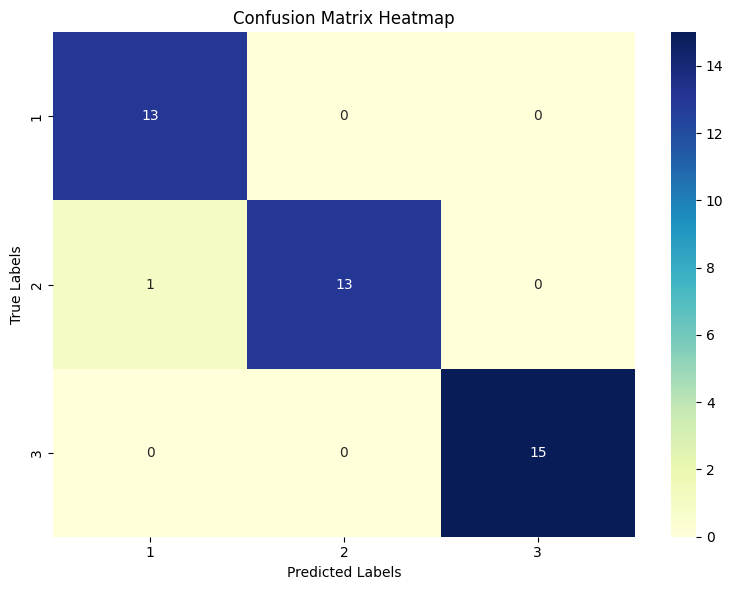

In [178]:
# Assuming you already have test_label and predictions defined
num_test_points = len(test_label)
print(f"Total number of data points in the testing set: {num_test_points}")


# Ensure labels are integers
test_labels = test_label.astype(int)
test_predictions = predictions.astype(int)



# Unique classes
unique_classes = np.unique(test_labels)



# Correct predictions per class
correct_predictions_per_class = {
    cls: np.sum((test_labels == cls) & (test_predictions == cls)) for cls in unique_classes
}

print("\nNumber of correct predictions for each class:")
for cls, correct in correct_predictions_per_class.items():
    print(f"Class {cls}: {correct} correct predictions")


# Confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("\nConfusion Matrix (NumPy Array):")
print(conf_matrix)




# DataFrame
conf_df = pd.DataFrame(conf_matrix, index=unique_classes, columns=unique_classes)
print("\nConfusion Matrix (DataFrame Format):")
print(conf_df)
# Heatmap of Conf matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()
